In [40]:
import ase.io as aio
from ase.visualize import view
from ase import Atoms

from pyscf import gto, dft

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm

import numpy as np

from matplotlib import pyplot as plt

In [30]:
nicotinamide_base = aio.read('/data/sahre/projects/atomic-energies/data/nicotinamide/base_structure.xyz')

In [25]:
view(nicotinamide_base)

<Popen: returncode: None args: ['/home/sahre/opt/miniconda3/envs/qm-tools/bi...>

In [45]:
mol_tmp = nicotinamide_base.copy()
mol_tmp.set_dihedral(1,2,6,8, 180, indices=[7,8,13,14])
view(mol_tmp)

<Popen: returncode: None args: ['/home/sahre/opt/miniconda3/envs/qm-tools/bi...>

In [58]:
np.save('/data/sahre/projects/atomic-energies/data/nicotinamide/pbe_energies', nicam_energies)

In [56]:
nicam_energies = []

for dihe in np.linspace(0, 360, 37)[:-1]:
    mol_tmp = nicotinamide_base.copy()
    mol_tmp.set_dihedral(1,2,6,8, dihe, indices=[7,8,13,14])
    
    atoms_pyscf = uqm.ase2pyscf(mol_tmp)
    mol = gto.Mole()
    mol.atom = atoms_pyscf
    mol.basis = 'def2-tzvp'
    
    mol.build()
    
    mf = dft.RKS(mol)
    mf.xc = 'pbe'
    mf.init_guess = 'atom'
    mf.kernel()
    nicam_energies.append([mf.e_tot, mf.e_tot-mf.energy_nuc(), mf.energy_nuc()])



******** <class 'pyscf.scf.atom_hf.AtomSphericAverageRHF'> ********
method = AtomSphericAverageRHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/sahre/git_repositories/APDFT/prototyping/atomic_energies/analysis/forcefield_failures/tmpynkw_nm8
max_memory 4000 MB (current use 515 MB)

WARN: Invalid number of electrons 7 for RHF method.

Set gradient conv threshold to 3.16228e-05
init E= -53.793209738507
cycle= 1 E= -53.8385772874267  delta_E= -0.0454  |g|=    0  |ddm|= 0.381
cycle= 2 E= -53.8461705715235  delta_E= -0.00759  |g|=    0  |ddm|= 0.179
cycle= 3 E= -53.8480703006579  delta_E= -0.0019  |g|=    0  |ddm|= 0.0526
cycle= 4 E= -53.8480838939768  delta_E= -1.36e-05  |g|=    0  |ddm|= 0.00836
cycle= 5 E= -53.8480839046132  delta_E= -1.06e-08  |g|=  

In [38]:
nicam_energies = np.array(nicam_energies)

In [39]:
nicam_energies

array([[-416.65452207, -823.76048659,  407.10596452],
       [-416.65241569, -822.9899659 ,  406.33755021],
       [-416.64772797, -822.30425789,  405.65652993],
       [-416.64973241, -823.09585477,  406.44612236],
       [-416.6481156 , -823.9728675 ,  407.32475189],
       [-416.64973926, -823.11703145,  406.46729219],
       [-416.6476685 , -822.31490603,  405.66723753],
       [-416.65225458, -822.98640336,  406.33414878]])

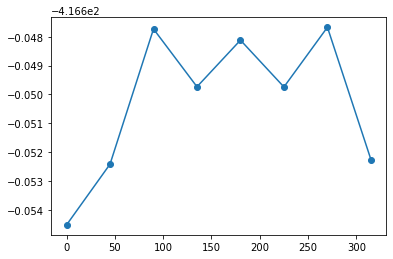

In [48]:
plt.plot(np.linspace(0, 360, 9)[:-1], nicam_energies[:,0], '-o')

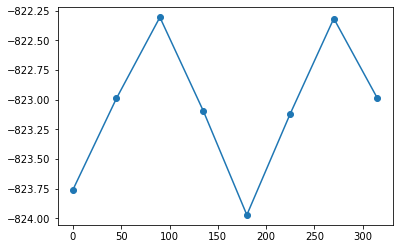

In [43]:
plt.plot(np.linspace(0, 360, 9)[:-1], nicam_energies[:,1], '-o')

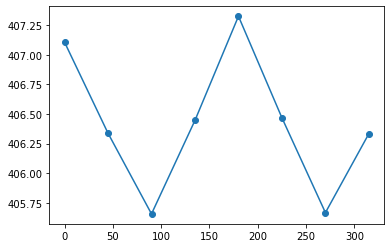

In [46]:
plt.plot(np.linspace(0, 360, 9)[:-1], nicam_energies[:,2], '-o')

In [47]:
nicam_energies

array([[-416.65452207, -823.76048659,  407.10596452],
       [-416.65241569, -822.9899659 ,  406.33755021],
       [-416.64772797, -822.30425789,  405.65652993],
       [-416.64973241, -823.09585477,  406.44612236],
       [-416.6481156 , -823.9728675 ,  407.32475189],
       [-416.64973926, -823.11703145,  406.46729219],
       [-416.6476685 , -822.31490603,  405.66723753],
       [-416.65225458, -822.98640336,  406.33414878]])

In [49]:
 -823.9728675+407.32475189

-416.64811561